In [1]:
import numpy as np

In [2]:
# Model Parameters

input_size = 3      # number of input features
layers = [4, 3]     # number of neurons in each layer (first and second)
output_size = 2     # number of classes in output

In [3]:
def softmax(a):
    e_a = np.exp(a) # Vector 
    ans = e_a/np.sum(e_a, axis=1, keepdims=True)
    return ans

In [4]:
a = np.array([[10,10],[10,20]])
print(softmax(a))
print()

b = np.array([[1,2,3],[3,3,4]])
print(softmax(b))

[[5.00000000e-01 5.00000000e-01]
 [4.53978687e-05 9.99954602e-01]]

[[0.09003057 0.24472847 0.66524096]
 [0.21194156 0.21194156 0.57611688]]


In [5]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        model = {}
        
        # Layer 1
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        # Layer 2
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        # Layer 3 (Output layer)
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
        self.activation_outputs = None
        
        
    def forward(self, X):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(X, W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2, W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        return y_
    
    
    def backward(self, X, Y, lr=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1, a2, y_ = self.activation_outputs
        m = X.shape[0]
        
        delta3 = y_ - Y
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3, W3.T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2, W2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # Update the model parameters
        self.model['W1'] -= lr*dw1
        self.model['b1'] -= lr*db1
        
        self.model['W2'] -= lr*dw2
        self.model['b2'] -= lr*db2
        
        self.model['W3'] -= lr*dw3
        self.model['b3'] -= lr*db3
        
        
    def predict(self, X):
        y_probs = self.forward(X)
        return np.argmax(y_probs, axis=1)
    
    
    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1, b2, b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1, a2, y_ = self.activation_outputs
        
        print("W1", W1.shape)
        print("b1", b1.shape)
        print("A1", a1.shape)
        print()
        
        print("W2", W2.shape)
        print("b2", b2.shape)
        print("A2", a2.shape)
        print()
        
        print("W3", W3.shape)
        print("b3", b3.shape)
        print("Y_", y_.shape)
        print()

In [6]:
def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1

    return y_oht
    
        
def loss(y_oht, y_probs):
    l = -np.mean(y_oht*np.log(y_probs))
    return l

#### Generating Data

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

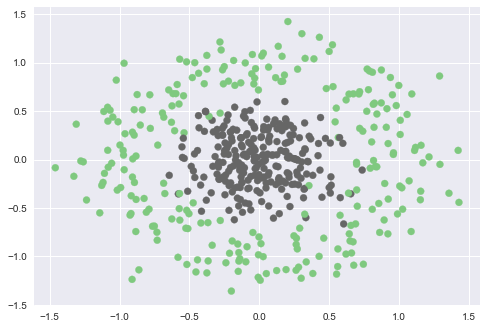

In [8]:
plt.style.use("seaborn")
X, Y = make_circles(n_samples=500, noise = 0.2, factor=0.25)
plt.scatter(X[:,0], X[:,1], c = Y, cmap=plt.cm.Accent)
plt.show()

In [9]:
print(X.shape, Y.shape)

(500, 2) (500,)


#### Training the Model

In [10]:
model = NeuralNetwork(input_size=2, layers=[10,5], output_size=2)

In [11]:
print(type(model))

<class '__main__.NeuralNetwork'>


In [12]:
def train(X, Y, model, epochs, lr=0.001, logs=True):
    losses = []
    classes = 2
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        losses.append(l)
        model.backward(X, Y_OHT, lr)
        
        if (logs) and (ix%10 == 0 or ix == epochs-1):
            print("Epoch %d, Loss %.4f"%(ix, l))
            
    return losses

In [13]:
losses = train(X, Y, model, 15000)

Epoch 0, Loss 0.3552
Epoch 10, Loss 0.1788
Epoch 20, Loss 0.1244
Epoch 30, Loss 0.0981
Epoch 40, Loss 0.0832
Epoch 50, Loss 0.0736
Epoch 60, Loss 0.0669
Epoch 70, Loss 0.0621
Epoch 80, Loss 0.0584
Epoch 90, Loss 0.0555
Epoch 100, Loss 0.0532
Epoch 110, Loss 0.0513
Epoch 120, Loss 0.0497
Epoch 130, Loss 0.0484
Epoch 140, Loss 0.0472
Epoch 150, Loss 0.0462
Epoch 160, Loss 0.0454
Epoch 170, Loss 0.0446
Epoch 180, Loss 0.0439
Epoch 190, Loss 0.0433
Epoch 200, Loss 0.0428
Epoch 210, Loss 0.0423
Epoch 220, Loss 0.0419
Epoch 230, Loss 0.0415
Epoch 240, Loss 0.0411
Epoch 250, Loss 0.0408
Epoch 260, Loss 0.0405
Epoch 270, Loss 0.0402
Epoch 280, Loss 0.0399
Epoch 290, Loss 0.0396
Epoch 300, Loss 0.0394
Epoch 310, Loss 0.0392
Epoch 320, Loss 0.0390
Epoch 330, Loss 0.0388
Epoch 340, Loss 0.0386
Epoch 350, Loss 0.0384
Epoch 360, Loss 0.0382
Epoch 370, Loss 0.0381
Epoch 380, Loss 0.0379
Epoch 390, Loss 0.0377
Epoch 400, Loss 0.0376
Epoch 410, Loss 0.0375
Epoch 420, Loss 0.0373
Epoch 430, Loss 0.0372

Epoch 3830, Loss 0.0298
Epoch 3840, Loss 0.0298
Epoch 3850, Loss 0.0298
Epoch 3860, Loss 0.0298
Epoch 3870, Loss 0.0298
Epoch 3880, Loss 0.0298
Epoch 3890, Loss 0.0298
Epoch 3900, Loss 0.0297
Epoch 3910, Loss 0.0297
Epoch 3920, Loss 0.0297
Epoch 3930, Loss 0.0297
Epoch 3940, Loss 0.0297
Epoch 3950, Loss 0.0297
Epoch 3960, Loss 0.0297
Epoch 3970, Loss 0.0297
Epoch 3980, Loss 0.0296
Epoch 3990, Loss 0.0296
Epoch 4000, Loss 0.0296
Epoch 4010, Loss 0.0296
Epoch 4020, Loss 0.0296
Epoch 4030, Loss 0.0296
Epoch 4040, Loss 0.0296
Epoch 4050, Loss 0.0296
Epoch 4060, Loss 0.0295
Epoch 4070, Loss 0.0295
Epoch 4080, Loss 0.0295
Epoch 4090, Loss 0.0295
Epoch 4100, Loss 0.0295
Epoch 4110, Loss 0.0295
Epoch 4120, Loss 0.0295
Epoch 4130, Loss 0.0294
Epoch 4140, Loss 0.0294
Epoch 4150, Loss 0.0294
Epoch 4160, Loss 0.0294
Epoch 4170, Loss 0.0294
Epoch 4180, Loss 0.0294
Epoch 4190, Loss 0.0294
Epoch 4200, Loss 0.0294
Epoch 4210, Loss 0.0293
Epoch 4220, Loss 0.0293
Epoch 4230, Loss 0.0293
Epoch 4240, Loss

Epoch 7320, Loss 0.0257
Epoch 7330, Loss 0.0257
Epoch 7340, Loss 0.0257
Epoch 7350, Loss 0.0257
Epoch 7360, Loss 0.0257
Epoch 7370, Loss 0.0256
Epoch 7380, Loss 0.0256
Epoch 7390, Loss 0.0256
Epoch 7400, Loss 0.0256
Epoch 7410, Loss 0.0256
Epoch 7420, Loss 0.0256
Epoch 7430, Loss 0.0256
Epoch 7440, Loss 0.0256
Epoch 7450, Loss 0.0256
Epoch 7460, Loss 0.0255
Epoch 7470, Loss 0.0255
Epoch 7480, Loss 0.0255
Epoch 7490, Loss 0.0255
Epoch 7500, Loss 0.0255
Epoch 7510, Loss 0.0255
Epoch 7520, Loss 0.0255
Epoch 7530, Loss 0.0255
Epoch 7540, Loss 0.0255
Epoch 7550, Loss 0.0255
Epoch 7560, Loss 0.0254
Epoch 7570, Loss 0.0254
Epoch 7580, Loss 0.0254
Epoch 7590, Loss 0.0254
Epoch 7600, Loss 0.0254
Epoch 7610, Loss 0.0254
Epoch 7620, Loss 0.0254
Epoch 7630, Loss 0.0254
Epoch 7640, Loss 0.0254
Epoch 7650, Loss 0.0254
Epoch 7660, Loss 0.0253
Epoch 7670, Loss 0.0253
Epoch 7680, Loss 0.0253
Epoch 7690, Loss 0.0253
Epoch 7700, Loss 0.0253
Epoch 7710, Loss 0.0253
Epoch 7720, Loss 0.0253
Epoch 7730, Loss

Epoch 10780, Loss 0.0226
Epoch 10790, Loss 0.0226
Epoch 10800, Loss 0.0226
Epoch 10810, Loss 0.0226
Epoch 10820, Loss 0.0226
Epoch 10830, Loss 0.0226
Epoch 10840, Loss 0.0226
Epoch 10850, Loss 0.0226
Epoch 10860, Loss 0.0226
Epoch 10870, Loss 0.0226
Epoch 10880, Loss 0.0226
Epoch 10890, Loss 0.0226
Epoch 10900, Loss 0.0226
Epoch 10910, Loss 0.0226
Epoch 10920, Loss 0.0225
Epoch 10930, Loss 0.0225
Epoch 10940, Loss 0.0225
Epoch 10950, Loss 0.0225
Epoch 10960, Loss 0.0225
Epoch 10970, Loss 0.0225
Epoch 10980, Loss 0.0225
Epoch 10990, Loss 0.0225
Epoch 11000, Loss 0.0225
Epoch 11010, Loss 0.0225
Epoch 11020, Loss 0.0225
Epoch 11030, Loss 0.0225
Epoch 11040, Loss 0.0225
Epoch 11050, Loss 0.0225
Epoch 11060, Loss 0.0224
Epoch 11070, Loss 0.0224
Epoch 11080, Loss 0.0224
Epoch 11090, Loss 0.0224
Epoch 11100, Loss 0.0224
Epoch 11110, Loss 0.0224
Epoch 11120, Loss 0.0224
Epoch 11130, Loss 0.0224
Epoch 11140, Loss 0.0224
Epoch 11150, Loss 0.0224
Epoch 11160, Loss 0.0224
Epoch 11170, Loss 0.0224


Epoch 14210, Loss 0.0208
Epoch 14220, Loss 0.0208
Epoch 14230, Loss 0.0208
Epoch 14240, Loss 0.0208
Epoch 14250, Loss 0.0208
Epoch 14260, Loss 0.0208
Epoch 14270, Loss 0.0208
Epoch 14280, Loss 0.0207
Epoch 14290, Loss 0.0207
Epoch 14300, Loss 0.0207
Epoch 14310, Loss 0.0207
Epoch 14320, Loss 0.0207
Epoch 14330, Loss 0.0207
Epoch 14340, Loss 0.0207
Epoch 14350, Loss 0.0207
Epoch 14360, Loss 0.0207
Epoch 14370, Loss 0.0207
Epoch 14380, Loss 0.0207
Epoch 14390, Loss 0.0207
Epoch 14400, Loss 0.0207
Epoch 14410, Loss 0.0207
Epoch 14420, Loss 0.0207
Epoch 14430, Loss 0.0207
Epoch 14440, Loss 0.0207
Epoch 14450, Loss 0.0207
Epoch 14460, Loss 0.0207
Epoch 14470, Loss 0.0207
Epoch 14480, Loss 0.0207
Epoch 14490, Loss 0.0207
Epoch 14500, Loss 0.0207
Epoch 14510, Loss 0.0207
Epoch 14520, Loss 0.0207
Epoch 14530, Loss 0.0207
Epoch 14540, Loss 0.0207
Epoch 14550, Loss 0.0206
Epoch 14560, Loss 0.0206
Epoch 14570, Loss 0.0206
Epoch 14580, Loss 0.0206
Epoch 14590, Loss 0.0206
Epoch 14600, Loss 0.0206


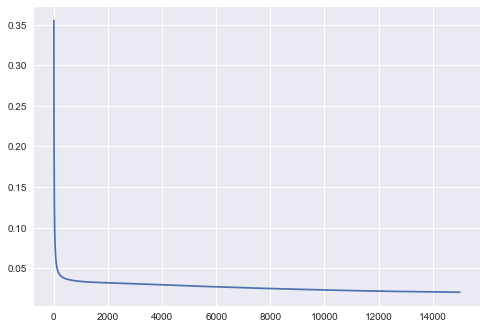

In [14]:
plt.plot(losses)
# plt.xlim(800,1200)

In [15]:
losses[857]

0.03425473476162712

In [16]:
# Accuracy

outputs = model.predict(X)
np.sum(outputs == Y)/Y.shape[0]

0.976

In [17]:
print(Y.shape)

(500,)


In [18]:
print(outputs.shape)

(500,)


In [19]:
from visualize import plot_decision_boundary

In [20]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


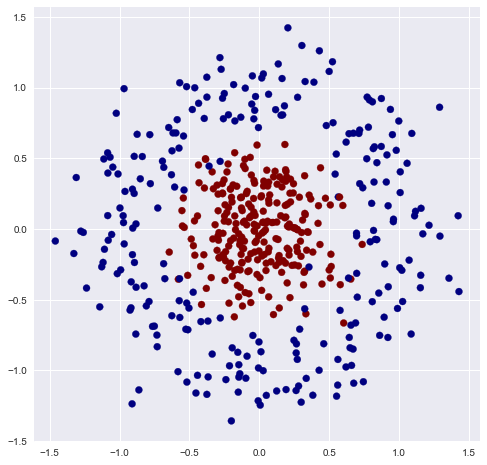

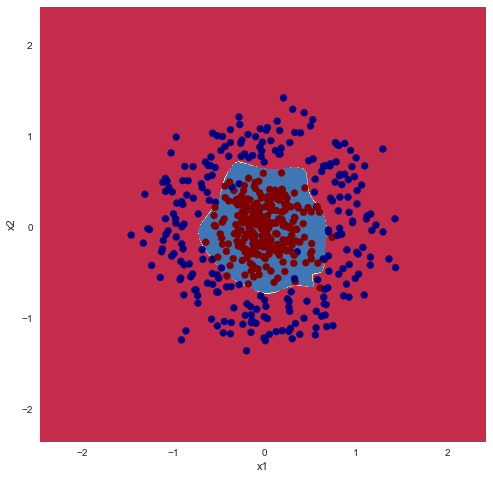

In [21]:
plt.style.use("fast")
# plt.set_cmap(plt.cm.Spectral)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c = Y, cmap=plt.cm.jet)

plt.figure(figsize=(8,8))
plot_decision_boundary(lambda x: model.predict(x), X, Y)

#### XOR Dataset

In [22]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([0,1,1,0])
print(X.shape, Y.shape)

(4, 2) (4,)


In [23]:
losses = train(X, Y, model, 300, 0.08)

Epoch 0, Loss 3.3326
Epoch 10, Loss 0.5980
Epoch 20, Loss 0.0478
Epoch 30, Loss 0.0257
Epoch 40, Loss 0.0188
Epoch 50, Loss 0.0150
Epoch 60, Loss 0.0126
Epoch 70, Loss 0.0108
Epoch 80, Loss 0.0096
Epoch 90, Loss 0.0086
Epoch 100, Loss 0.0079
Epoch 110, Loss 0.0073
Epoch 120, Loss 0.0068
Epoch 130, Loss 0.0063
Epoch 140, Loss 0.0059
Epoch 150, Loss 0.0056
Epoch 160, Loss 0.0053
Epoch 170, Loss 0.0049
Epoch 180, Loss 0.0046
Epoch 190, Loss 0.0044
Epoch 200, Loss 0.0041
Epoch 210, Loss 0.0039
Epoch 220, Loss 0.0038
Epoch 230, Loss 0.0036
Epoch 240, Loss 0.0035
Epoch 250, Loss 0.0034
Epoch 260, Loss 0.0032
Epoch 270, Loss 0.0031
Epoch 280, Loss 0.0031
Epoch 290, Loss 0.0030
Epoch 299, Loss 0.0029


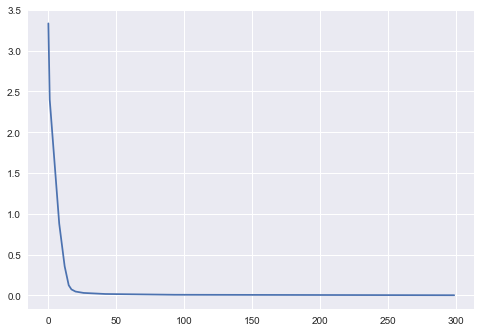

In [24]:
plt.plot(losses)

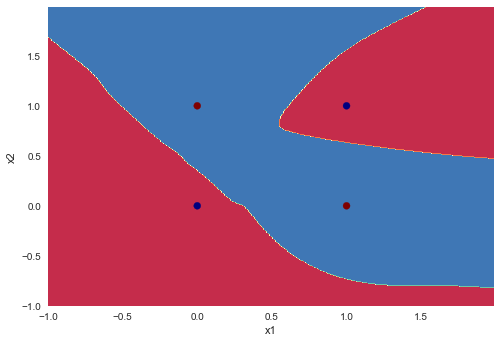

In [25]:
plot_decision_boundary(lambda x: model.predict(x), X, Y)

In [26]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [27]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Acc 100.00%


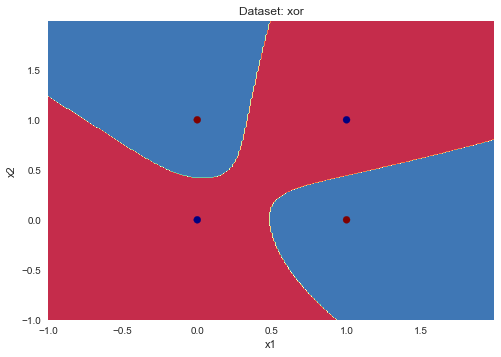

Training Acc 96.00%


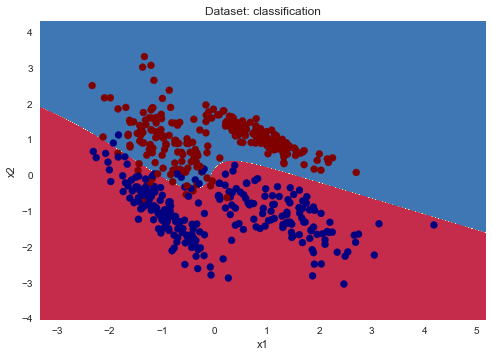

Training Acc 97.40%


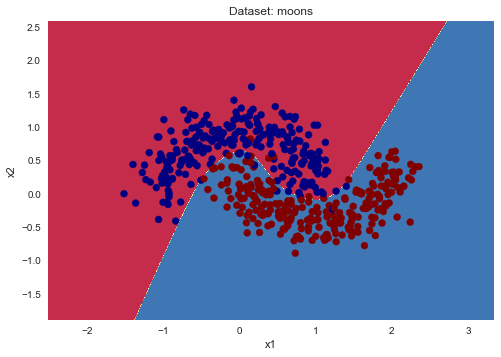

Training Acc 96.40%


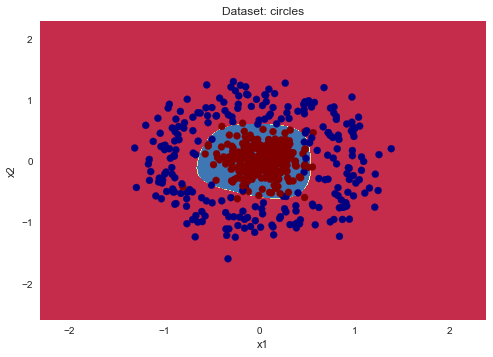

In [37]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.2f"%(training_accuracy*100) + "%")
    
    plt.title("Dataset: " + d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()